# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud
from ydata_profiling import ProfileReport
warnings.simplefilter(action='ignore', category=FutureWarning)

1) Read the dataset to be analyze

In [3]:
movies_eda = pd.read_parquet("../datasets/movies_eda.parquet")
# movies_eda_csv = pd.read_csv("../datasets/movies_eda.csv")

In [4]:
movies_eda.head(3) # Chequeo de los primeros datos del dataset

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,release_year,name_genre,collection,company,countries,language,return,actors_names,director_names
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,5415.0,1995,"[Comedy, Animation, Family]",Toy Story Collection,Pixar Animation Studios,United States of America,English,12.451801,"[Laurie Metcalf, Tom Hanks, Sarah Freeman, Pen...",[John Lasseter]
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,1995,"[Adventure, Fantasy, Family]",[],TriStar Pictures Teitler Film Interscope Commu...,United States of America,English Français,4.043035,"[Adam Hann-Byrd, Sarah Gilson, Kirsten Dunst, ...",[Joe Johnston]
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,1995,"[Comedy, Romance]",Grumpy Old Men Collection,Warner Bros. Lancaster Gate,United States of America,English,0.000000,"[Walter Matthau, Sophia Loren, Jack Lemmon, Ke...",[Howard Deutch]


* Get the dummies so we can after determine which genre stands out the most

In [5]:
genres = movies_eda['name_genre'].explode().str.get_dummies().groupby(level=0).sum()

- Little preview of the dataset fields

In [6]:
movies_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42236 entries, 0 to 42235
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             42236 non-null  Float64       
 1   id                 42236 non-null  int32         
 2   original_language  42225 non-null  object        
 3   overview           41334 non-null  object        
 4   popularity         42236 non-null  float64       
 5   release_date       42236 non-null  datetime64[ns]
 6   revenue            42236 non-null  float64       
 7   runtime            41997 non-null  float64       
 8   status             42161 non-null  object        
 9   tagline            19053 non-null  object        
 10  title              42236 non-null  object        
 11  vote_average       42236 non-null  float64       
 12  vote_count         42236 non-null  float64       
 13  release_year       42236 non-null  int32         
 14  name_g

In [7]:
movies_eda.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,42236.0,42236.000000,42236.000000,42236,4.223600e+04,41997.000000,42236.000000,42236.000000,42236.000000,4.223600e+04
mean,4158984.580216,106643.196160,2.914570,1992-05-28 08:28:12.432995584,1.116029e+07,93.846108,5.631494,109.331731,1991.916304,7.090847e+02
min,0.0,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.0,25773.750000,0.387676,1978-11-07 06:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.0,58395.500000,1.136580,2001-06-08 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.0,152809.250000,3.720514,2010-11-02 06:00:00,0.000000e+00,107.000000,6.800000,35.000000,2010.000000,0.000000e+00
max,380000000.0,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,17209002.025013,111668.737789,5.743069,NaN,6.374327e+07,37.681428,1.921202,489.118362,23.840613,7.741987e+04


In [8]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42236 entries, 0 to 42235
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Action           42236 non-null  int64
 1   Adventure        42236 non-null  int64
 2   Animation        42236 non-null  int64
 3   Comedy           42236 non-null  int64
 4   Crime            42236 non-null  int64
 5   Documentary      42236 non-null  int64
 6   Drama            42236 non-null  int64
 7   Family           42236 non-null  int64
 8   Fantasy          42236 non-null  int64
 9   Foreign          42236 non-null  int64
 10  History          42236 non-null  int64
 11  Horror           42236 non-null  int64
 12  Music            42236 non-null  int64
 13  Mystery          42236 non-null  int64
 14  Romance          42236 non-null  int64
 15  Science Fiction  42236 non-null  int64
 16  TV Movie         42236 non-null  int64
 17  Thriller         42236 non-null  int64
 18  War        

In [9]:
genres.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.00000,42236.000000
mean,0.145161,0.076688,0.043825,0.297377,0.093806,0.089639,0.441330,0.061440,0.050384,0.035609,0.030945,0.099986,0.035917,0.053769,0.147552,0.067099,0.016005,0.162752,0.02943,0.023298
std,0.352267,0.266099,0.204708,0.457109,0.291562,0.285668,0.496552,0.240139,0.218738,0.185317,0.173171,0.299985,0.186086,0.225565,0.354659,0.250197,0.125497,0.369144,0.16901,0.150849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


#### First Observation:
1) Data Completeness: Upon initial examination, it can be observed that the <i>movies</i> dataset has a relatively high percentage of filled records, meaning it lacks null values. However, this does not imply that all the data is informative.

2) Financial Data Variability: Columns related to money, such as budget, revenue, or return, exhibit the highest standard deviation. However, since this dataset contains information about movies released over a wide range of years, and a significant portion of the data in these columns consists of the number 0 (zero), such values are to be expected.

3) Genre Distribution: Based on the <i></i> dataframe and observing the mean value, it is suggested that drama-genre movies will predominate over the others.

## Showing the infor with graphics

* Most spoken language in the movies

<Axes: title={'center': 'Cantidad de peliculas / Lenguaje original'}, xlabel='original_language', ylabel='count'>

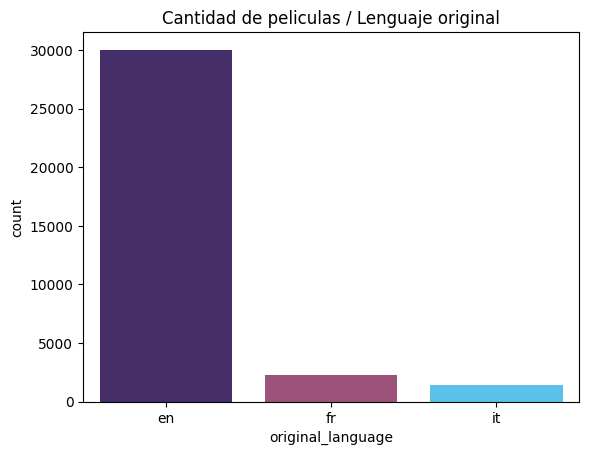

In [10]:
order = movies_eda["original_language"].value_counts().iloc[:3].index
plt.title("Cantidad de peliculas / Lenguaje original")
sns.countplot(data=movies_eda, x="original_language",order=order,palette=['#432371',"#aA457B","#44ccff"],legend=False)

**Observation Regarding Movie Production Language:** <br>
Within this dataset, a predominance of English-language movie production is evident. This could be attributed to various factors, but we will refrain from formulating hypotheses that are not relevant to our current focus.

On the other hand, when analyzing the data for the recommendation system, one could suggest utilizing this language column as part of the training process if we aim to recommend movies to users from France, for instance. However, we should be catious to avoid <i>overfitting</i>.



### Which genre stands out over the others

In [11]:
# Amount of each genre in the dataset 
genres[genres["Animation"]==1]["Animation"].sum() #Demostracion de que es lo que se planteara en la proxima celda

1851

In [12]:
genre_columns = genres.columns[0:]
cant_per_genre = {genre: genres[genres[genre] == 1][genre].sum() for genre in genre_columns}

In [13]:
cant_per_genre.items()

dict_items([('Action', 6131), ('Adventure', 3239), ('Animation', 1851), ('Comedy', 12560), ('Crime', 3962), ('Documentary', 3786), ('Drama', 18640), ('Family', 2595), ('Fantasy', 2128), ('Foreign', 1504), ('History', 1307), ('Horror', 4223), ('Music', 1517), ('Mystery', 2271), ('Romance', 6232), ('Science Fiction', 2834), ('TV Movie', 676), ('Thriller', 6874), ('War', 1243), ('Western', 984)])

In [14]:
# Create the dataframe and sort it in a descending way based on the amount of movies that had been qualified as an specific genre
df_genre_cant = pd.DataFrame(cant_per_genre.items(),columns=["Genero","Cantidad de peliculas"]).sort_values(by="Cantidad de peliculas", ascending=False)

In [15]:
df_genre_cant

,Genero,Cantidad de peliculas
6,Drama,18640
3,Comedy,12560
17,Thriller,6874
14,Romance,6232
0,Action,6131
11,Horror,4223
4,Crime,3962
5,Documentary,3786
1,Adventure,3239
15,Science Fiction,2834


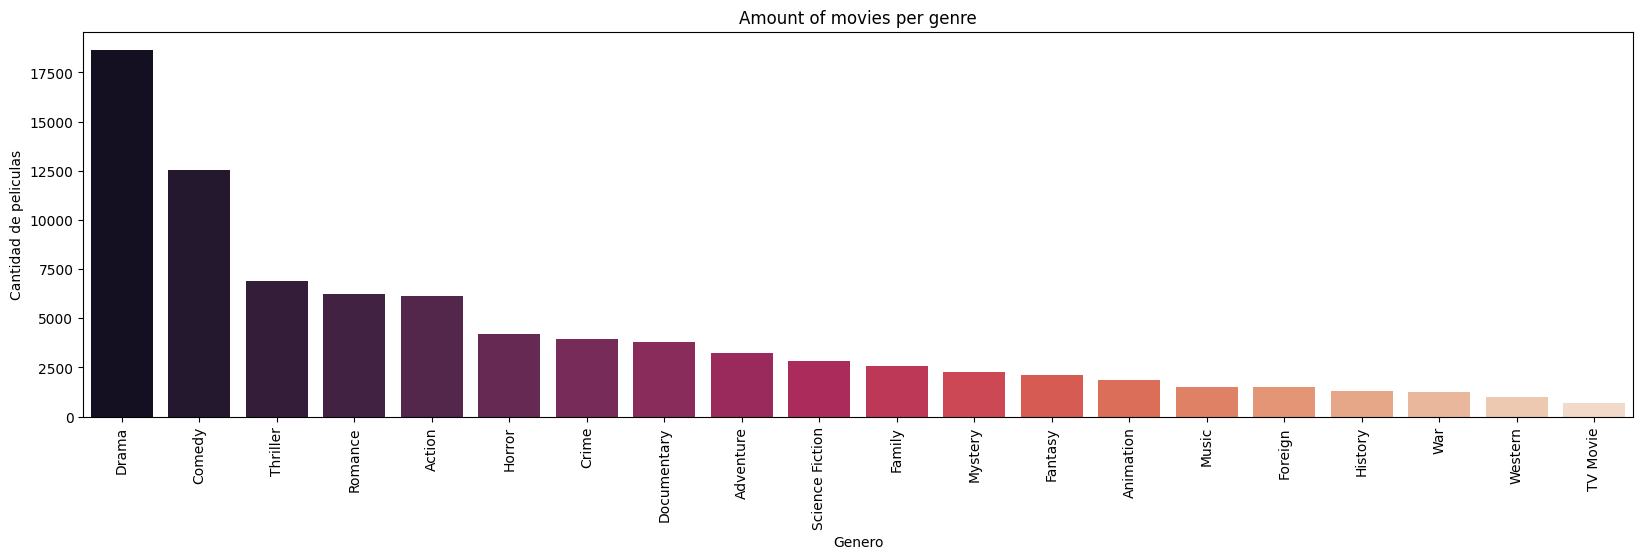

In [16]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title("Amount of movies per genre")
sns.barplot(df_genre_cant,x="Genero",y="Cantidad de peliculas",palette="rocket")
plt.xticks(rotation = 90)
plt.show()

As can be observed, the ``drama`` category stands out from the rest. However, compared to the previous graph, this one is slightly more balanced, which could be beneficial for the **Machine Learning model**.

### Time duration

Text(0, 0.5, 'Cantidad')

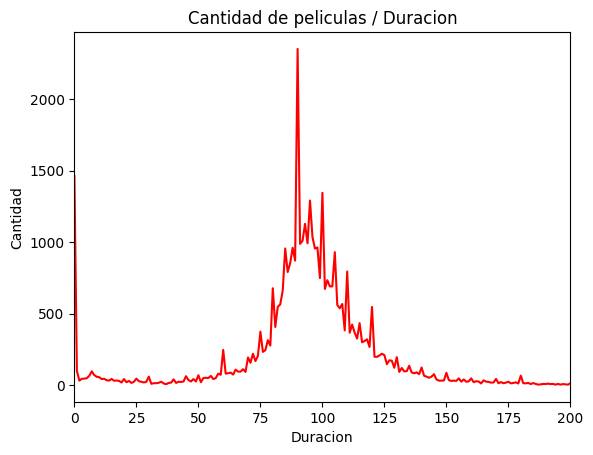

In [17]:
cant = movies_eda["runtime"].value_counts()
# plt.plot(color="yellow")
sns.lineplot(cant,color="red")
plt.xlim([0,200])
plt.title("Cantidad de peliculas / Duracion")
plt.xlabel("Duracion")
plt.ylabel("Cantidad")


<p style=color:rgb(150,150,150)>The average movie duration is between 80/90 minutes</p>

### Premiers per year

(1920.0, 2020.0)

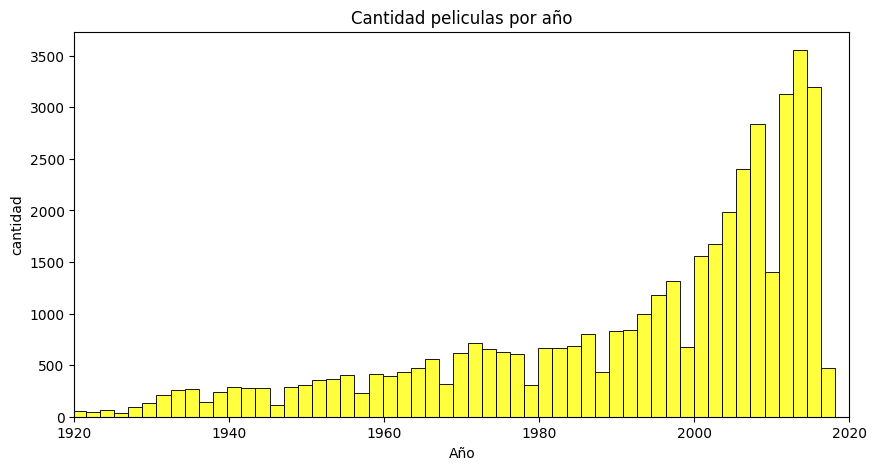

In [18]:
# genero = genres[genres==1].sum().sort_values(ascending=False)[0:10]
# years = movies_eda.value_counts(subset="release_year")
fig,ax=plt.subplots(figsize=(10,5))
# sns.lineplot(years)
# plt.xticks(rotation=45)
# plt.show()

sns.histplot(movies_eda["release_year"],color="yellow")
plt.xlabel("Año")
plt.ylabel("cantidad")
plt.title("Cantidad peliculas por año")
plt.xlim([1920,2020])

* Based on the provided histogram, a significant increase in movie production can be observed over the years. This trend could be attributed to various factors, such as technological advancements, increased demand, or a combination of both.

#### Analysis of the Predominant Companies in the Market

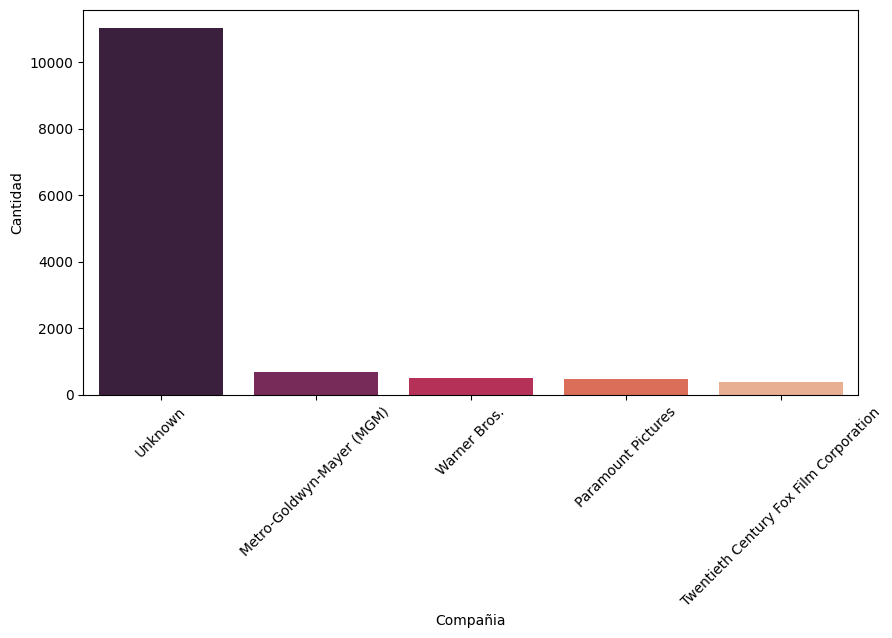

In [19]:
company = movies_eda["company"].value_counts(ascending=False)[0:5]
fig,axes=plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
# sns.histplot(movies_eda["company"])
sns.barplot(company,palette="rocket")
plt.ylabel("Cantidad")
plt.xlabel("Compañia")
plt.show()

* Based on the provided parameters, it is evident that a significant number of movies in the dataset lack a designated production company. This could potentially hinder the performance of our recommendation system when suggesting movies from different companies. As a result,

### Analysis of Sagas in the Dataset

In [20]:
movies_eda["collection"] = movies_eda["collection"].replace("[]","Unknown")
franchises = movies_eda["collection"].value_counts()
franchises = pd.DataFrame(franchises.items(),columns=["Franquicia","Cantidad"]).iloc[0:10]


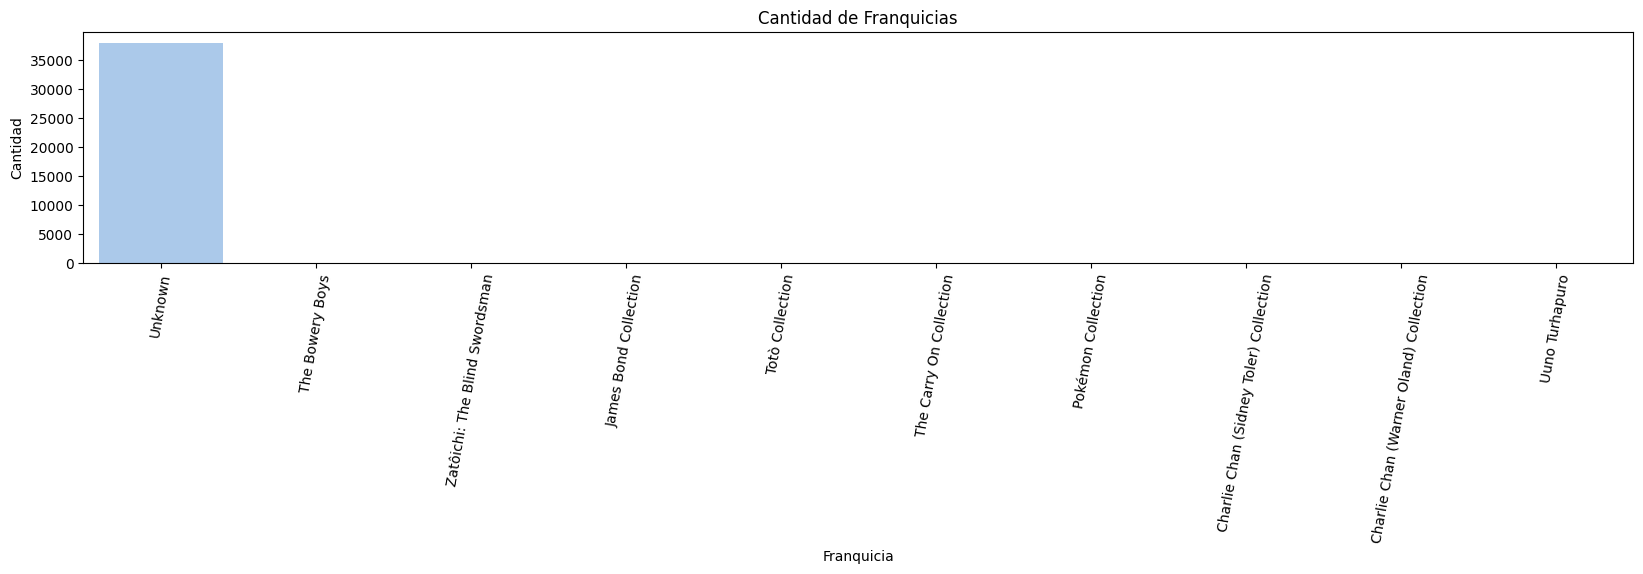

In [21]:
figure,axes = plt.subplots(figsize=(20,3))
palette =  sns.color_palette("pastel")
sns.barplot(franchises, x="Franquicia",y="Cantidad",palette=palette)
plt.xticks(rotation=80)
plt.title("Cantidad de Franquicias")
plt.show()

Following the same reasoning outlined in the section regarding the ``company ``column analysis, the ``collection`` column will also be excluded from further analysis.

### Correlation analyses of numerical variables

<Axes: >

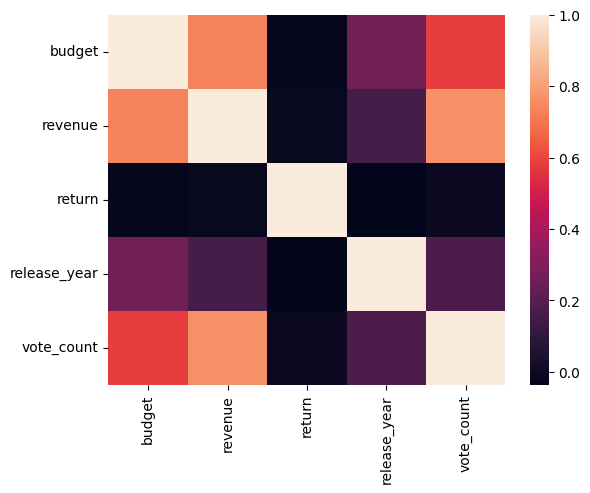

In [22]:
numerical=movies_eda[["budget","revenue","return","release_year","vote_count"]]
no_zero = numerical[numerical["return"]!=0]
sns.heatmap(no_zero.corr())

<p>Based on the preceding analysis, it can be observed that the number of votes for a movie tends to increase with the movie's budget. This correlation could suggest that a significant portion of the budget may have been allocated towards marketing and promotional efforts aimed at reaching a wider audience.</p>

### Mean amount of votes per genre.

In [23]:
df_merged = pd.concat([genres,movies_eda],axis=1)
genre_columns = genres.columns[0:]
avg_votes_per_genre = {genre: df_merged[df_merged[genre] == 1]['vote_count'].mean() for genre in genre_columns}

In [24]:
content = avg_votes_per_genre.items()

In [25]:
df_genre = pd.DataFrame(content,columns=["genre","cant_votos"]).sort_values(ascending=False,by="cant_votos")

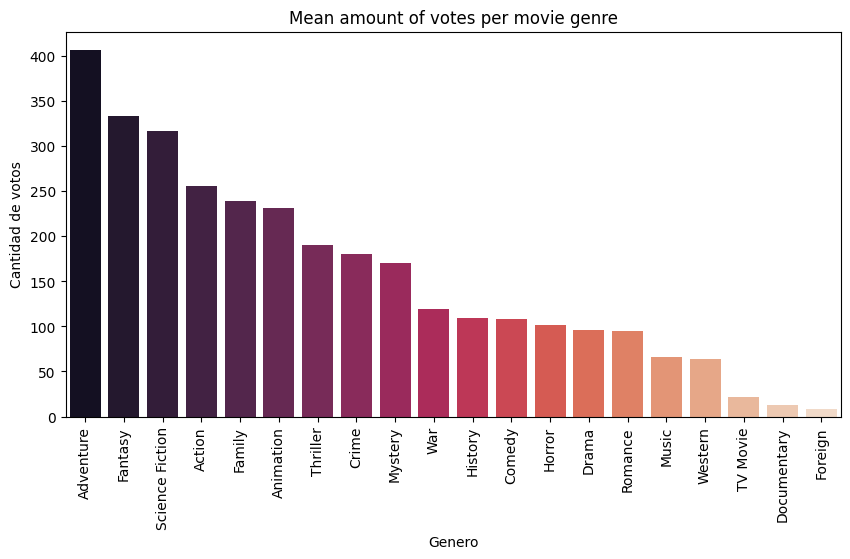

In [26]:
fig,axes = plt.subplots(figsize=(10,5))
sns.barplot(df_genre, x="genre",y="cant_votos",palette="rocket")
plt.xticks(rotation=90)
plt.title("Mean amount of votes per movie genre")
plt.xlabel("Genero")
plt.ylabel("Cantidad de votos")
plt.show()

While the ``drama`` genre has the largest number of movies in the dataset, it is intriguing to observe that the ``adventure`` category holds a higher vote count. This unexpected finding suggests that despite the abundance of drama films, adventure movies seem to resonate more strongly with audiences and generate a greater level of engagement.

### Word cloud for `overview`, `title` and `country` columns

In [27]:
movies_eda["overview"] = movies_eda["overview"].fillna(value=".")
titulo = " ".join(movies_eda["title"])
overview = " ".join(movies_eda["overview"])
countries = " ".join(movies_eda["countries"])

- `Title`

In [28]:
white_cloud = WordCloud(background_color="white",width=700, height=500)
wordcloud_title = white_cloud.generate(titulo)

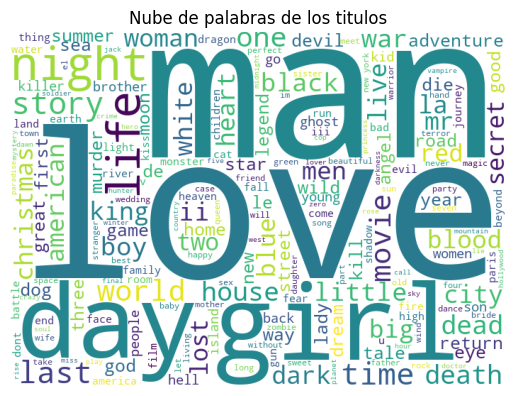

In [29]:
plt.imshow(wordcloud_title)
plt.title("Nube de palabras de los titulos")
plt.axis("off")
plt.show()

* `Overview`

In [30]:
second_cloud = WordCloud(background_color="white",width=700, height=500)
wordcloud_overview = second_cloud.generate(overview)

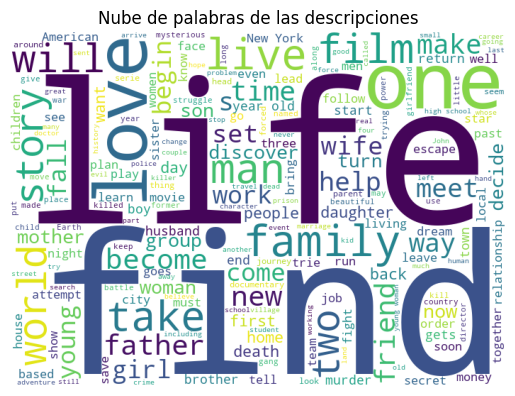

In [31]:
plt.imshow(wordcloud_overview)
plt.title("Nube de palabras de las descripciones")
plt.axis("off")
plt.show()

- `Countries`

In [32]:
country_cloud = WordCloud(background_color="white",width=700, height=500)
wordcloud_title = country_cloud.generate(countries)

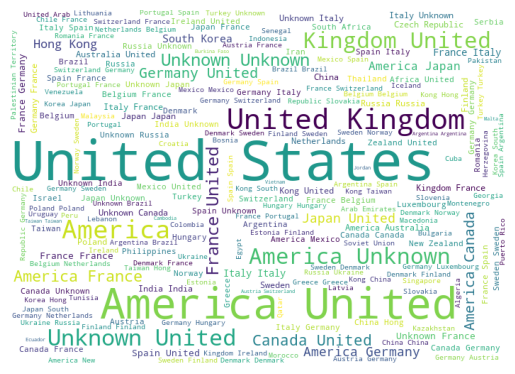

In [33]:
plt.imshow(wordcloud_title)
plt.axis("off")
plt.show()

* Observations

1) **Similarity of Word Clouds in title and overview Columns**: The word clouds generated from the ``title`` and `overview` columns appear to be quite similar. It would be worth exploring whether these two columns could be effectively combined in the recommendation model.

2) English-Language Dominance in countries Graph: The countries graph reinforces the observation made in the first graph, indicating that the majority of movies in the dataset are produced in English-speaking countries, with the United States being the most prominent.